<a href="https://colab.research.google.com/github/god05212/Deep-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install packages
!pip install pandas
!pip install matplotlib
!pip install opencv-python
!pip install tqdm
!pip install -U scikit-learn
!pip install --upgrade pip
!pip install keras

In [ ]:
import urllib.request
import numpy as np #for numerical computations
import pandas as pd #for dataframe operations
from scipy import misc
import io
import sys
import os.path
from os import listdir
from PIL import Image
import glob

from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs
import urllib.request
from tqdm import tqdm

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from statistics import mean
import sklearn
import tensorflow as tf 

In [ ]:
pd.set_option('display.max_colwidth', -1)
np.set_printoptions(threshold=sys.maxsize)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


# 데이터 불러오기 & 전처리

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MovieGenre.csv to MovieGenre.csv


In [ ]:
# FILENAME = 'MovieGenre.csv'
# FILE_PATH = r'C:\Users\...\project4.csv'

In [ ]:
df = pd.read_csv('MovieGenre.csv', encoding = 'latin')
df.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,"https://images-na.ssl-images-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UX182_CR0,0,182,268_AL_.jpg"
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,"https://images-na.ssl-images-amazon.com/images/M/MV5BZTk2ZmUwYmEtNTcwZS00YmMyLWFkYjMtNTRmZDA3YWExMjc2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR10,0,182,268_AL_.jpg"
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMjQxM2YyNjMtZjUxYy00OGYyLTg0MmQtNGE2YzNjYmUyZTY1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTczMTMyMTgyM15BMl5BanBnXkFtZTcwOTc4OTQyMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg"
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BOTEyNzg5NjYtNDU4OS00MWYxLWJhMTItYWU4NTkyNDBmM2Y0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"


In [ ]:
df.shape

(40108, 6)

## 결측값 제거

In [ ]:
df.isna().sum()

imdbId        0  
Imdb Link     0  
Title         0  
IMDB Score    48 
Genre         145
Poster        725
dtype: int64

In [ ]:
df=df.dropna(axis=0)
df.shape

(39246, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39246 entries, 0 to 40106
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbId      39246 non-null  int64  
 1   Imdb Link   39246 non-null  object 
 2   Title       39246 non-null  object 
 3   IMDB Score  39246 non-null  float64
 4   Genre       39246 non-null  object 
 5   Poster      39246 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
# show poster images from url
def show_image_from_url(image_url):

  """
  Fetches image online from the image_url and plots it as it is using matplotlib's pyplot's image show
  """

  response = urllib.request.urlopen(image_url)
  image = np.asarray(bytearray(response.read()), dtype="uint8")
  image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
  plt.imshow(image_rgb), plt.axis('off')

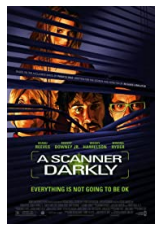

In [ ]:
# show row 9564
plt.figure()
show_image_from_url(df['Poster'].loc[9564])

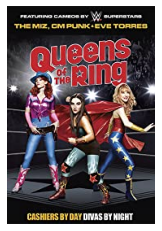

In [ ]:
# show row 25809
plt.figure()
show_image_from_url(df['Poster'].loc[25809])

In [ ]:
#Print the label categories we are working with
print(df.columns)


#Print the total amount of movies in the dataset
print("Total Number of Movies is: " + str(len(df.index)))

#We will count the number of movies with a specific genre
genrelist = []
length = len(df)
for n in range(0,length):
    genres = str(df.iloc[n]["Genre"])
    genres = genres.split("|")
    genrelist.extend(genres)
    
#We will also display number of Genres     
unique_genres = list(set(genrelist))
print("Total Number of Genres is: " + str(len(unique_genres)))

Index(['imdbId', 'Imdb Link', 'Title', 'IMDB Score', 'Genre', 'Poster'], dtype='object')
Total Number of Movies is: 39246
Total Number of Genres is: 28


In [ ]:
# 이상치 확인
df_Q = df.query('Genre.str.contains("Game-Show")',engine='python')
df_Q

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
25809,2330546,http://www.imdb.com/title/tt2330546,Les reines du ring (2013),5.5,Comedy|Game-Show,"https://images-na.ssl-images-amazon.com/images/M/MV5BNzQxNjM5MTAxMF5BMl5BanBnXkFtZTgwNzQyMzkxMzE@._V1_UY268_CR4,0,182,268_AL_.jpg"


In [ ]:
# 이상치 삭제
drop_values = ['Game-Show','Adult', 'Reality-TV', 'Talk-Show']
movies = df[~df['Genre'].str.contains('|'.join(drop_values))]
movies=movies.reset_index()

In [ ]:
# 중복 확인
movies.duplicated().sum()

0

In [ ]:
#After cleansing data

#Print the label categories we are working with
print(movies.columns)


#Print the total amount of movies in the dataset
print("Total Number of Movies is: " + str(len(movies.index)))

#We will count the number of movies with a specific genre
genrelist = []
length = len(movies)
for n in range(0,length):
    genres = str(movies.iloc[n]["Genre"])
    genres = genres.split("|")
    genrelist.extend(genres)
    
#We will also display number of Genres     
unique_genres = list(set(genrelist))
print("Total Number of Genres is: " + str(len(unique_genres)))

Index(['index', 'imdbId', 'Imdb Link', 'Title', 'IMDB Score', 'Genre',
       'Poster'],
      dtype='object')
Total Number of Movies is: 39228
Total Number of Genres is: 24


Short 918
Musical 837
Music 1268
Film-Noir 403
War 1162
Comedy 12557
Family 2084
Thriller 4797
Romance 6188
News 79
Western 846
Sci-Fi 2002
Adventure 3806
Action 5307
History 1403
Drama 19845
Documentary 3554
Biography 1971
Fantasy 2004
Crime 5249
Horror 3977
Mystery 2386
Animation 1704
Sport 698


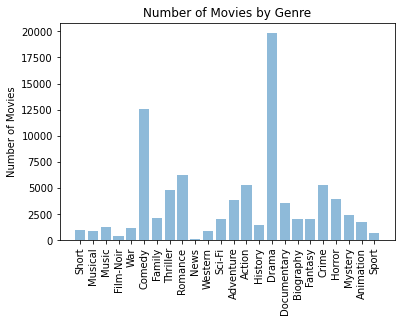

In [ ]:
#Print amount of movies with specific genre
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))
    
#Create Bar Graph of values
y_pos = np.arange(len(unique_genres))
plt.bar(y_pos,countlist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

Short 7.07
Musical 6.60
Music 6.76
Film-Noir 6.96
War 6.91
Comedy 6.28
Family 6.32
Thriller 5.92
Romance 6.52
News 7.32
Western 6.36
Sci-Fi 5.51
Adventure 6.28
Action 5.98
History 7.10
Drama 6.65
Documentary 7.30
Biography 7.06
Fantasy 6.16
Crime 6.46
Horror 5.36
Mystery 6.30
Animation 6.84
Sport 6.59


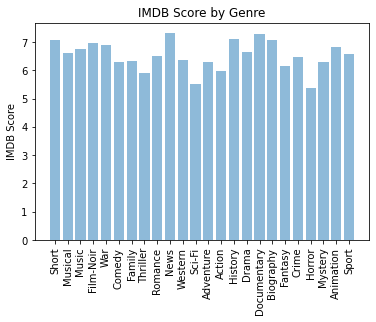

In [ ]:
# We will also find the average score by genre
avglist = []
for genre in unique_genres:
    movies_of_genre = movies[movies["Genre"].str.contains(genre,na=False)]
    avg = movies_of_genre["IMDB Score"].mean()
    avglist.append(avg)
    print(genre + " {0:.2f}".format(avg))

    
plt.bar(y_pos,avglist,align='center',alpha=0.5)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylabel("IMDB Score")
plt.title("IMDB Score by Genre")
plt.show()

## url 이미지 파일 다운로드

In [ ]:
#Method 1 to download images

not_found = []
for index, row in tqdm(df.iterrows()):
    
    url = row['Poster']
    imdb_id = row['imdbId']
    
    file_path = r"C:\Users\geun\project4\Posters" + str(imdb_id) + ".jpg"
    
    try:
        response = urllib.request.urlopen(url)
        data = response.read()
        file = open(file_path, 'wb')
        file.write(bytearray(data))
        file.close()
    except:
        not_found.append(imdb_id)
        
print("Number of posters not found = ", len(not_found))
print("Following IMDB_ID posters were not found::", not_found)


39246it [1:12:50,  8.98it/s]

Number of posters not found =  2482
Following IMDB_ID posters were not found:: [112302, 114057, 115012, 112697, 113347, 109950, 110299, 112499, 113010, 113537, 117002, 115734, 116483, 112579, 75314, 112373, 114808, 110647, 111055, 114015, 109093, 112541, 109508, 112857, 112899, 109579, 109758, 113028, 109771, 110216, 113538, 76759, 110367, 113808, 113948, 114151, 110413, 108394, 111161, 114888, 114857, 109040, 109484, 109830, 110091, 105226, 111756, 114047, 106226, 106489, 106519, 109443, 109480, 109783, 112966, 107151, 107207, 110197, 110265, 107413, 107468, 107818, 108000, 105032, 108065, 111201, 108162, 111418, 108358, 108399, 108515, 110259, 109403, 110363, 99785, 117381, 115956, 48473, 52572, 117104, 117774, 113270, 113568, 111237, 116905, 118113, 61495, 53459, 115632, 107575, 68646, 109255, 116985, 119214, 113542, 32904, 50419, 54698, 25316, 53125, 53604, 33870, 58385, 47437, 31381, 84370, 43014, 33467, 32143, 32484, 38109, 42451, 32599, 29947, 17350, 38300, 32022, 26029, 63350, 

In [ ]:
# Check which downloaded images are corrupt and remove them 
bad_images = []
for file in glob.glob("*.jpg"):

    try:
        img = Image.open(file) # open image file
        img.verify() # verify its an image
    except (IOError, SyntaxError) as e:
        print('Bad file:', file) 

        bad_images.append(file)
        
print("Number of corrupt files:", len(bad_images))

Number of corrupt files: 0


In [ ]:
not_found=[112302, 112697, 113347, 109950, 110299, 112499, 113010, 113537, 117002, 115734, 112579, 75314, 114808, 110647, 111055, 114015, 112541, 109508, 112857, 112899, 109579, 109758, 109771, 113538, 76759, 110367, 113808, 113948, 114151, 110413, 108394, 111161, 114857, 109040, 109484, 109830, 105226, 114047, 106489, 106519, 109480, 112966, 107207, 110265, 107413, 107468, 107818, 105032, 108065, 111201, 108162, 111418, 108358, 108399, 108515, 110259, 110363, 99785, 117381, 115956, 48473, 117774, 113568, 116905, 118113, 61495, 53459, 115632, 107575, 68646, 116985, 113542, 32904, 50419, 54698, 25316, 53604, 33870, 47437, 43014, 32143, 32484, 32599, 29947, 32022, 26029, 63350, 116259, 72951, 41890, 102798, 115600, 115491, 39286, 84865, 68334, 91763, 101761, 104348, 116422, 71853, 84589, 95765, 109942, 120121, 97937, 80684, 90605, 56592, 78788, 86190, 41959, 99685, 78748, 54215, 80455, 71562, 81398, 75686, 70735, 52311, 50212, 71315, 40897, 92005, 77416, 102536, 32455, 38355, 87553, 101458, 116601, 101540, 74285, 75005, 115495, 117057, 119791, 115433, 115471, 115633, 104691, 116240, 119008, 118859, 120152, 118064, 119109, 120087, 118556, 118883, 118966, 120207, 119874, 119488, 120323, 119349, 120257, 118900, 119592, 119365, 118617, 119819, 120670, 116845, 118747, 114690, 120782, 119942, 119305, 118229, 118577, 120725, 120531, 139362, 73540, 140688, 18578, 21746, 26752, 82158, 97239, 91369, 70047, 119910, 17136, 54649, 47478, 88814, 62737, 77305, 82199, 77698, 90756, 89385, 97757, 78158, 38969, 111359, 83798, 120832, 90848, 88323, 120611, 94721, 74512, 65112, 42994, 33922, 31505, 30341, 29811, 28212, 20142, 19702, 128442, 92537, 87810, 92225, 96073, 102558, 120776, 118736, 120835, 119802, 120586, 24216, 120863, 119336, 110978, 92112, 91991, 145893, 128133, 124298, 51744, 77189, 125659, 120836, 37913, 149723, 78346, 34398, 49366, 158811, 48254, 56193, 90774, 91419, 92627, 144168, 129111, 66765, 80339, 96244, 85334, 130121, 105698, 73802, 164108, 157183, 76150, 169547, 50814, 99558, 68990, 168740, 80179, 34240, 59260, 137523, 72742, 185371, 83254, 61789, 32215, 56197, 105156, 86856, 185125, 24852, 40522, 93512, 105265, 87091, 155711, 97717, 160509, 144715, 124315, 174204, 106455, 64276, 32590, 105323, 104694, 105414, 18773, 21749, 87265, 9018, 94347, 55353, 101698, 39748, 92834, 89994, 108526, 88760, 36775, 101615, 91142, 99871, 93378, 95564, 89643, 74958, 79640, 86927, 160644, 102898, 85701, 104549, 112634, 71772, 71288, 70481, 154443, 95977, 86979, 79501, 89530, 91635, 94882, 23622, 200669, 39404, 99797, 38718, 40580, 70679, 219854, 60176, 104299, 105813, 131972, 65938, 178050, 46303, 234137, 187696, 202677, 57887, 162236, 54387, 219952, 146984, 181536, 149624, 181865, 97662, 92546, 92641, 92655, 92804, 92854, 92974, 93093, 93225, 93278, 93418, 93467, 212985, 177650, 191636, 192071, 90213, 55895, 58453, 152015, 48248, 45810, 90770, 212720, 58953, 45699, 59124, 57693, 84788, 65777, 93227, 48261, 49966, 76786, 96764, 94715, 94739, 94746, 94747, 94783, 95088, 95145, 95326, 95993, 96029, 96037, 91949, 96280, 96320, 96380, 96425, 96945, 97109, 97276, 97438, 97500, 97567, 97607, 97626, 163025, 98343, 98436, 108517, 87130, 80377, 80402, 261392, 86352, 273799, 58283, 80634, 80641, 243255, 67093, 87666, 246578, 278102, 249478, 139951, 24264, 60437, 80671, 80715, 80724, 20697, 90852, 60714, 88103, 94318, 35423, 120737, 280707, 117653, 93106, 268696, 295552, 69995, 44391, 60218, 77199, 75718, 50986, 127516, 80836, 80863, 80904, 80928, 76276, 81109, 81249, 81259, 32993, 81480, 81529, 76729, 86325, 102103, 266391, 72737, 99892, 88931, 65916, 108311, 110157, 86397, 92652, 254199, 56406, 210065, 89798, 254455, 82054, 90799, 80931, 270480, 84133, 99128, 283832, 86373, 58230, 93113, 82362, 84049, 298744, 101453, 86361, 82081, 82175, 82329, 82457, 82507, 84090, 82910, 87075, 297162, 77549, 293815, 71671, 89378, 83694, 75968, 66563, 45917, 86978, 71334, 58371, 54417, 83996, 85852, 84302, 84359, 84422, 83107, 84777, 84935, 68441, 35417, 60182, 98093, 109327, 69291, 54759, 100211, 100301, 175777, 29808, 93660, 58621, 100053, 319829, 94764, 73345, 51776, 46438, 91830, 104850, 327850, 86541, 115561, 87909, 59221, 62190, 63591, 110169, 53593, 102460, 317676, 74802, 71276, 34409, 56211, 48956, 242653, 333764, 85426, 65832, 102034, 100151, 104627, 107711, 150662, 90180, 24025, 22286, 87892, 102818, 26778, 87280, 167260, 37382, 296042, 97028, 67589, 166158, 13140, 15400, 360009, 58930, 96921, 45094, 82516, 36515, 85370, 188055, 282410, 113725, 76734, 62229, 105327, 105017, 63285, 46268, 102011, 56943, 177215, 50613, 66549, 70948, 53976, 258760, 70518, 56412, 17668, 87193, 65481, 61189, 60522, 77360, 99399, 93913, 18455, 189553, 54462, 43880, 38873, 28478, 32617, 41944, 17765, 77235, 89160, 31448, 18051, 65889, 61420, 54188, 71565, 115738, 120408, 22913, 377752, 57681, 61678, 45586, 93886, 87597, 78437, 95468, 47216, 59470, 99292, 99623, 28108, 40806, 64381, 72848, 87795, 41268, 368008, 64137, 58294, 52549, 78975, 101301, 38048, 385004, 53716, 55069, 125510, 13257, 15324, 15624, 15881, 18737, 22158, 23458, 23948, 24865, 24894, 25301, 25898, 27478, 27884, 28683, 28804, 29322, 31867, 34449, 35415, 37094, 38913, 39926, 40550, 40636, 41507, 42531, 47203, 47444, 47677, 48579, 49710, 54020, 56058, 56194, 56512, 58724, 59311, 59825, 61101, 63426, 63654, 64612, 65642, 65772, 67023, 67341, 70300, 72933, 74084, 74870, 75376, 76740, 77559, 77687, 85450, 88771, 89603, 89689, 89793, 90713, 92337, 93171, 93777, 94056, 104030, 104511, 104567, 106504, 106950, 110200, 110426, 113617, 114437, 118760, 119227, 119657, 119794, 131566, 161292, 164538, 165196, 169858, 189456, 192455, 195909, 200472, 202381, 212830, 213682, 234837, 243575, 244092, 269389, 295682, 320193, 338450, 339135, 385017, 405821, 119263, 345032, 90310, 73107, 45557, 43255, 41085, 26421, 353969, 372532, 94979, 363290, 34303, 109661, 31334, 65513, 120626, 25919, 80157, 78056, 39937, 107623, 55618, 91027, 95341, 66904, 86136, 56111, 37465, 384806, 277909, 384369, 361498, 63141, 19777, 397619, 29971, 372784, 78133, 26129, 106613, 325596, 368774, 67900, 405422, 401244, 380599, 36191, 386140, 118635, 228277, 426155, 53677, 389957, 25929, 58409, 67535, 103704, 60474, 34277, 451850, 26266, 96769, 370754, 284929, 58642, 59314, 61695, 416496, 43633, 421994, 384814, 53750, 93435, 225481, 466856, 72402, 77372, 464105, 98333, 205725, 326429, 30848, 449467, 32155, 25028, 29030, 418832, 473753, 38577, 32342, 120088, 382383, 44040, 419946, 478049, 91786, 366721, 369359, 84861, 36154, 81036, 475937, 468492, 101725, 822854, 114863, 493247, 66491, 471030, 414931, 49531, 77904, 499556, 923752, 478134, 405508, 857265, 831884, 452623, 762110, 64816, 478829, 759612, 1032856, 15016, 467200, 813547, 86102, 481797, 473389, 63775, 11439, 12752, 53434, 762110, 64816, 478829, 759612, 1032856, 15016, 467200, 813547, 86102, 481797, 473389, 63775, 11439, 12752, 53434, 949489, 783608, 452608, 42692, 71521, 45848, 870204, 488905, 1183732, 233044, 46384, 929860, 1205489, 1034303, 59565, 101326, 92732, 844666, 69951, 1287845, 1241195, 62228, 78128, 108596, 242572, 110490, 75572, 100624, 407008, 1286800, 1142972, 92550, 1423592, 1010055, 42179, 86542, 72761, 103190, 34175, 73166, 56371, 99949, 96880, 100879, 106661, 60048, 79839, 1425244, 87866, 76297, 138645, 81040, 9932, 91415, 110805, 40607, 119872, 22017, 63417, 242285, 84764, 139153, 258761, 806027, 28355, 35823, 1187043, 65872, 78382, 819755, 33175, 53772, 32636, 57318, 227194, 23241, 64828, 51786, 884762, 63094, 94642, 57933, 312859, 47840, 863136, 65233, 43044, 1391544, 59555, 62728, 59729, 42039, 62277, 1594971, 44811, 40745, 21874, 34902, 18526, 154129, 1183276, 45758, 107086, 41515, 50569, 1020543, 47550, 71458, 54102, 88241, 12651, 1428050, 23911, 33110, 56341, 78878, 41373, 55073, 20876, 59829, 47167, 21106, 89821, 55571, 61597, 66318, 11541, 12255, 12224, 121411, 13025, 110076, 56308, 62203, 13422, 37420, 214529, 29577, 465326, 53003, 41672, 882978, 50915, 56279, 373960, 76319, 372303, 1156506, 1334585, 47279, 49881, 20570, 51667, 50156, 53752, 25791, 292081, 918575, 367204, 73190, 1255951, 34251, 19195, 45102, 104693, 100791, 37615, 97332, 70748, 14497, 17449, 45907, 72149, 25718, 109962, 38668, 37054, 36919, 112710, 88454, 1365023, 73634, 99927, 31311, 46008, 52997, 449144, 42513, 1530970, 42247, 67119, 984155, 126004, 1461418, 96842, 109162, 71788, 42665, 65895, 140336, 69989, 30996, 67467, 77751, 52957, 21375, 76107, 6826, 73096, 32028, 100409, 383678, 7145, 1541788, 1366409, 97951, 70898, 85635, 55927, 72204, 64247, 27221, 455565, 395479, 93832, 131409, 109770, 43118, 54197, 1035729, 29571, 80623, 85864, 75939, 79891, 86301, 68294, 63013, 97550, 113376, 101256, 33288, 42650, 64038, 2344672, 818931, 2655938, 98048, 51182, 99151, 20062, 2316787, 222012, 60440, 111552, 65380, 179183, 104467, 95483, 32030, 7264, 109167, 2284766, 54601, 67622, 1060256, 60291, 61411, 2292959, 45077, 44453, 60126, 68455, 113926, 67004, 100031, 94651, 86340, 86896, 80616, 69371, 77247, 2343617, 65776, 88765, 83900, 53651, 94962, 91560, 1596572, 60434, 44477, 3216510, 65744, 57967, 87373, 80764, 76706, 271984, 99557, 135520, 29695, 27908, 85627, 2063008, 44417, 204714, 997184, 36882, 52104, 1552624, 3146360, 72201, 58981, 99172, 57960, 44013, 71610, 67377, 28665, 88402, 69986, 79631, 78034, 49870, 69086, 45544, 26891, 54367, 77769, 55459, 79966, 41387, 29949, 64310, 51019, 98492, 21542, 36189, 3793686, 5339, 75801, 51844, 3330828, 70578, 1891917, 39244, 57920, 79615, 116014, 208502, 147310, 902999, 50714, 32263, 3104818, 88805, 166973, 76760, 97074, 29058, 25880, 92802, 2093977, 87129, 43153, 62363, 83931, 84781, 13386, 64269, 1194616, 50323, 23973, 51605, 50483, 3919322, 42257, 60143, 115899, 93964, 62712, 82193, 1599351, 41169, 69318, 77130, 90601, 196931, 67359, 97176, 60893, 1946298, 31477, 85328, 72189, 43687, 23943, 57212, 53354, 114137, 36581, 49280, 29516, 58238, 44075, 23322, 58585, 25833, 55453, 107392, 42674, 67983, 51759, 63236, 63098, 49834, 20479, 43079, 22981, 50580, 24465, 76644, 192802, 50771, 56673, 38929, 23202, 50993, 61173, 73880, 82209, 1496792, 289782, 1580427, 84887, 46352, 61646, 63568, 2226495, 192578, 206588, 89265, 54037, 106301, 76555, 80401, 1379228, 2132486, 73735, 93986, 367495, 71864, 119310, 70599, 76112, 74703, 72007, 144246, 1863280, 50717, 252985, 98606, 2719094, 67418, 147374, 4377918, 75344, 66212, 33337, 1278060, 80802, 207377, 95183, 92822, 62732, 76670, 3496372, 825279, 427219, 1114698, 46722, 92863, 56957, 78294, 72651, 87385, 90079, 91165, 93315, 98411, 91909, 124869, 94037, 181012, 94941, 88255, 80809, 85547, 88775, 460557, 47479, 2404217, 64895, 56661, 456144, 50087, 20590, 85486, 74473, 207415, 1534017, 94015, 26739, 242519, 104870, 29951, 2556308, 114234, 86343, 995031, 432047, 291376, 93645, 66914, 77917, 459516, 48217, 62207, 79211, 52921, 84698, 193524, 3973410, 71258, 2660888, 75357, 248428, 2199711, 94374, 364647, 80971, 408730, 53879, 49593, 111190, 1038072, 200755, 69235, 63288, 56883, 100265, 189072, 3025994, 4215766, 78848, 189071, 290057, 357139, 189070, 418141, 1777608, 2162709, 808508, 94813, 41423, 43325, 107606, 2664080, 88200, 303151, 487176, 78963, 108480, 294264, 75347, 108339, 1798148, 107259, 107260, 1704731, 2318158, 2356302, 3417870, 2877108, 458050, 2152896, 4328798, 1483820, 1501298, 202055, 68562, 246643, 55423, 93910, 91213, 87589, 79111, 455829, 345177, 24373, 847526, 77973, 62113, 218616, 15634, 4180576, 4429128, 59116, 69375, 115638, 80379, 1895408, 242256, 1954206, 1180583, 77834, 29819, 56467, 1233487, 442781, 57521, 75838, 71782, 83677, 482374, 3817962, 155671, 83936, 2825120, 1156479, 410537, 97410, 97971, 45072, 4025514, 69141, 78976, 57535, 63979, 59589, 4176604, 91328, 117437, 233422, 118931, 152836, 218533, 60450, 79200, 99377, 240659, 57422, 78528, 81165, 62859, 291855, 70687, 217590, 37313, 63272, 42697, 30277, 85755, 2075247, 1758563, 99430, 319736, 92144, 84845, 138074, 54756, 3094914, 83261, 826039, 114577, 28509, 104119, 47978, 2444006, 1851988, 55839, 27688, 2964120, 76149, 124437, 278291, 104298, 53806, 57558, 58920, 82813, 426075, 396563, 451833, 349878, 72648, 59655, 34076, 1786650, 64729, 70783, 488798, 1105709, 56703, 54827, 59369, 1630603, 126562, 58523, 1891788, 92720, 65378, 1609168, 105271, 1355546, 1922545, 422908, 1463410, 32262, 20701, 64493, 5491920, 51927, 220640, 182730, 26132, 100581, 85375, 54628, 78073, 1821317, 1679215, 62693, 3828796, 92669, 33403, 2395421, 85863, 5200962, 3715854, 61067, 920457, 2555958, 4258292, 1705772, 5178278, 4987556, 4806232, 5128328, 4937812, 3320578, 1857670, 99043, 368400, 417241, 807944, 1039952, 984177, 1388441, 377321, 984202, 152979, 161981, 205451, 4188654, 1891755, 449951, 1655607, 376144, 375878, 1725795, 464071, 376127, 376076, 77278, 65788, 66920, 4016934, 84408, 135534, 2072214, 79882, 1667418, 104874, 68662, 382205, 40861, 39490, 76440, 46714, 78978, 80321, 86476, 2263814, 124014, 5613056, 5503594, 41771, 81421, 65750, 2056554, 1517471, 3598648, 5071886, 97136, 57892, 66258, 47464, 49125, 68622, 27133, 56640, 2166214, 290937, 78320, 58101, 491603, 3000844, 54826, 67576, 88757]

In [ ]:
df_2 = df[~df['imdbId'].isin(not_found)]
df_2.shape

(37495, 6)

In [ ]:
df_2.columns
df_2.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,"https://images-na.ssl-images-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UX182_CR0,0,182,268_AL_.jpg"
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,"https://images-na.ssl-images-amazon.com/images/M/MV5BZTk2ZmUwYmEtNTcwZS00YmMyLWFkYjMtNTRmZDA3YWExMjc2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UY268_CR10,0,182,268_AL_.jpg"
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMjQxM2YyNjMtZjUxYy00OGYyLTg0MmQtNGE2YzNjYmUyZTY1XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BMTczMTMyMTgyM15BMl5BanBnXkFtZTcwOTc4OTQyMQ@@._V1_UY268_CR4,0,182,268_AL_.jpg"
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,"https://images-na.ssl-images-amazon.com/images/M/MV5BOTEyNzg5NjYtNDU4OS00MWYxLWJhMTItYWU4NTkyNDBmM2Y0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_UX182_CR0,0,182,268_AL_.jpg"


In [ ]:
# Keep only IMDB_ID, Genres, Title

df_3 = df_2[['imdbId','Title','Genre']]
print(df_3.shape)
df_3.head()

(37495, 3)


,imdbId,Title,Genre
0,114709,Toy Story (1995),Animation|Adventure|Comedy
1,113497,Jumanji (1995),Action|Adventure|Family
2,113228,Grumpier Old Men (1995),Comedy|Romance
3,114885,Waiting to Exhale (1995),Comedy|Drama|Romance
4,113041,Father of the Bride Part II (1995),Comedy|Family|Romance


In [ ]:
image_list = []
for file in glob.glob("*.jpg"):
    image_list.append(file)
    
print("Number of files found:", len(image_list))

Number of files found: 36194


In [ ]:
# Mis-match still exists, so we further perform data-cleaning
# This is performed in the next python script: "Clean_data"
# We export the df_3 as csv, to be used with images downloaded in the Posters folder

df_3.to_csv("MovieGenre_cleaned.csv", index = None)

### id와 이미지 row 정렬

In [ ]:
# Resolve mis-match
# Create new dataframe with paths of found images and fill with corresponding metadata from dataframe. 

image_paths = []
imdb_id = []
genres = []
titles = []

for file in glob.glob("*.jpg"):
    #/content/C:\Users\geun\project4\Posters1000095.jpg
    #img_id = file.split('.')[0]    
    img_id = file[file.find('\\')+28 : file.find('.')]
    title = df_3[df_3["imdbId"] == int(img_id)]["Title"].values[0]
    genre = df_3[df_3["imdbId"] == int(img_id)]["Genre"].values[0]
    
    image_paths.append(file)
    imdb_id.append(img_id)
    genres.append(genre)
    titles.append(title)
    
    
df_2 = pd.DataFrame({'imdbId': imdb_id, 'Genre': genres, 'Title': titles, 'Image_Paths': image_paths})

In [ ]:
print(df_2.shape)
df_2.head()

(36194, 4)


,imdbId,Genre,Title,Image_Paths
0,84786,Comedy|Action,They Call Me Bruce? (1982),C:\Users\geun\project4\Posters84786.jpg
1,488174,Crime|Drama|Mystery,Orora gongju (2005),C:\Users\geun\project4\Posters488174.jpg
2,110989,Comedy|Family,Ri¢hie Ri¢h (1994),C:\Users\geun\project4\Posters110989.jpg
3,4373868,Drama|Romance|Thriller,Classmates (2015),C:\Users\geun\project4\Posters4373868.jpg
4,340919,Crime|Drama|Romance,Puerto Vallarta Squeeze (2004),C:\Users\geun\project4\Posters340919.jpg


In [ ]:
columnsTitles = ['Image_Paths','imdbId','Genre','Title']
df_2 = df_2.reindex(columns=columnsTitles)
df_2.head()

,Image_Paths,imdbId,Genre,Title
0,C:\Users\geun\project4\Posters84786.jpg,84786,Comedy|Action,They Call Me Bruce? (1982)
1,C:\Users\geun\project4\Posters488174.jpg,488174,Crime|Drama|Mystery,Orora gongju (2005)
2,C:\Users\geun\project4\Posters110989.jpg,110989,Comedy|Family,Ri¢hie Ri¢h (1994)
3,C:\Users\geun\project4\Posters4373868.jpg,4373868,Drama|Romance|Thriller,Classmates (2015)
4,C:\Users\geun\project4\Posters340919.jpg,340919,Crime|Drama|Romance,Puerto Vallarta Squeeze (2004)


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36194 entries, 0 to 36193
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_Paths  36194 non-null  object
 1   imdbId       36194 non-null  object
 2   Genre        36194 non-null  object
 3   Title        36194 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [ ]:
df_2.to_csv("MovieGenre_final.csv", index = None)

### 원본데이터와 전처리데이터 비교

In [ ]:
# Investigating which of the Imdb_Id of the original csv, did not have a corresponding image

Original_ID_list = np.asarray(df['imdbId']).astype(int)
ID_with_images_found = np.asarray(df_2['imdbId']).astype(int)

#Original lengths of the two arrays 
print("ORIGINAL:", len(Original_ID_list))
print("TRIMMED:", len(ID_with_images_found))

#First compare the unique values of these two arrays
uniq1, counts1 = np.unique(Original_ID_list, return_counts=True)
print("#unique ID values in ORIGINAL:", len(uniq1))

uniq2, counts2 = np.unique(ID_with_images_found, return_counts=True)
print("#unique ID values in TRIMMED:", len(uniq2))

ORIGINAL: 39246
TRIMMED: 36194
#unique ID values in ORIGINAL: 38654
#unique ID values in TRIMMED: 36194


In [ ]:
#Find the ID values which are non-unique
non_unique_id = []
for i in range(len(counts1)):
    
    if (counts1[i]>1):
        #print(uniq1[i], "with freq=", counts1[i])
        non_unique_id.append(uniq1[i])
        
#print(non_unique_id)

#Find rows where the column value of imdb is among these non_unique_id values
for i in range(len(non_unique_id)):
    
    print(df.loc[df['imdbId'] == int(non_unique_id[i])])

       imdbId  ...                                                                                                                             Poster
12409  11358   ...  https://images-na.ssl-images-amazon.com/images/M/MV5BMTQ1MTk1NDU4M15BMl5BanBnXkFtZTgwNTE4NDcwMjE@._V1_UX182_CR0,0,182,268_AL_.jpg
13003  11358   ...  https://images-na.ssl-images-amazon.com/images/M/MV5BMTQ1MTk1NDU4M15BMl5BanBnXkFtZTgwNTE4NDcwMjE@._V1_UX182_CR0,0,182,268_AL_.jpg

[2 rows x 6 columns]
       imdbId  ...                                                                                                                             Poster
12748  11439   ...  https://images-na.ssl-images-amazon.com/images/M/MV5BMTEwMDc3NjQ0NjBeQTJeQWpwZ15BbWU4MDMxODQ3MDIx._V1_UX182_CR0,0,182,268_AL_.jpg
13342  11439   ...  https://images-na.ssl-images-amazon.com/images/M/MV5BMTEwMDc3NjQ0NjBeQTJeQWpwZ15BbWU4MDMxODQ3MDIx._V1_UX182_CR0,0,182,268_AL_.jpg

[2 rows x 6 columns]
       imdbId  ...                                      

In [ ]:
df_2.shape

(36194, 4)

### 레이블 값 벡터화

In [ ]:
Genre_list = df_2['Genre']
print(len(Genre_list))

36194


In [ ]:
# Breaks "Genre" into the constituting individual genres
def find_genres(genre):
    
    start = 0
    set_of_genre = []
    for i in range(len(genre)):
        
        k=0
        substring = ""
        if (genre[i]=='|'):
            substring = genre[start:i]
            start = i+1
            k = 1
        
        if(i==len(genre)-1):
            substring = genre[start:i+1]
            k = 1
            
        if (k==1):
            set_of_genre.append(substring)         
    
    return (set_of_genre)

In [ ]:
# Extract list of genre values for each image
all_genre = []
Genre_list = df_2['Genre']

for i in range (len(Genre_list)):
    
    set_of_genre = find_genres(Genre_list[i])
    
    for j in range (len(set_of_genre)):
        all_genre.append(set_of_genre[j])
        
uniq, counts = np.unique(all_genre, return_counts=True)
print("Number of unique genres:", len(uniq))
print("Unique genres are:", uniq)
dict(zip(uniq, counts))

Number of unique genres: 28
Unique genres are: ['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'Game-Show'
 'History' 'Horror' 'Music' 'Musical' 'Mystery' 'News' 'Reality-TV'
 'Romance' 'Sci-Fi' 'Short' 'Sport' 'Talk-Show' 'Thriller' 'War' 'Western']


{'Action': 4879,
 'Adult': 8,
 'Adventure': 3493,
 'Animation': 1589,
 'Biography': 1820,
 'Comedy': 11536,
 'Crime': 4775,
 'Documentary': 3414,
 'Drama': 18238,
 'Family': 1913,
 'Fantasy': 1846,
 'Film-Noir': 334,
 'Game-Show': 1,
 'History': 1309,
 'Horror': 3685,
 'Music': 1167,
 'Musical': 742,
 'Mystery': 2180,
 'News': 77,
 'Reality-TV': 2,
 'Romance': 5582,
 'Sci-Fi': 1838,
 'Short': 861,
 'Sport': 640,
 'Talk-Show': 6,
 'Thriller': 4435,
 'War': 1063,
 'Western': 756}

In [ ]:
# Prepare multi-hot-encoded-labels for the various genres
def multi_hot_encoded_labels(img_id, genre):
    
    col_names =  ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
                  'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']
    
    set_of_genre = find_genres(genre)
    
    row=[]
    row.append(img_id)
    
    for i in range(len(col_names)):
        
        found = 0
        for j in range (len(set_of_genre)):
            if (set_of_genre[j]==col_names[i]):
                found = 1
                break
        
        row.append(found)
    
    row.append(genre) #add the overall combined genre for record purposes
        
    return row

In [ ]:
# Perform the encoding of the labels and save data in the format :
# Img-ID <multi-hot-encoded-labels> overall_genre

df = pd.read_csv("MovieGenre_final.csv", encoding="ISO-8859-1")
all_data = []

for index, row in tqdm(df.iterrows()):
    
    path = row['Image_Paths']
    genre = row['Genre']
    row = multi_hot_encoded_labels(path, genre)
    
    all_data.append(row)

col_names =  ['Img-paths', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
                  'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'Genre']

np.savetxt("Multi_hot_encoded_data.csv", np.asarray(all_data), fmt='%s', delimiter=" ")   
np.savetxt("Encoded_data_column_lookup.csv", np.asarray(col_names), fmt='%s', delimiter=" ")

36194it [00:03, 9735.33it/s]


In [ ]:
df_encoded = pd.read_csv("Multi_hot_encoded_data.csv", delimiter=" ", 
                  names =  ['Img-paths', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History',
                  'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance',
                  'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'Genre'])

df_encoded.head()

,Img-paths,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Genre
0,C:\Users\geun\project4\Posters84786.jpg,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Comedy|Action
1,C:\Users\geun\project4\Posters488174.jpg,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Crime|Drama|Mystery
2,C:\Users\geun\project4\Posters110989.jpg,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Comedy|Family
3,C:\Users\geun\project4\Posters4373868.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Drama|Romance|Thriller
4,C:\Users\geun\project4\Posters340919.jpg,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Crime|Drama|Romance


### train 80 /val 15 /test 5 

In [ ]:
# To split into train / validation / test in the ratio 80 / 15 / 5%

df = pd.read_csv("Multi_hot_encoded_data.csv", delimiter=" ")
random_seed = 50
train_df = df.sample(frac=0.70, random_state=random_seed) #Taking 70% of the data
tmp_df = df.drop(train_df.index)
test_df = tmp_df.sample(frac=0.1, random_state=random_seed) #Taking 20% of the remaining (after train is taken)
valid_df = tmp_df.drop(test_df.index)

print("Train_df=",len(train_df))
print("Val_df=",len(valid_df))
print("Test_df=",len(test_df))

np.savetxt("Train.csv", train_df, fmt='%s', delimiter=" ")
np.savetxt("Test.csv", test_df, fmt='%s', delimiter=" ")
np.savetxt("Valid.csv", valid_df, fmt='%s', delimiter=" ")

#Numpy method
#train, validate, test = np.split(df_encoded.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
#np.split will split at 60% of the length of the shuffled array, 
#then 80% of length (which is an additional 20% of data), thus leaving a remaining 20% of the data.

Train_df= 25335
Val_df= 9772
Test_df= 1086


In [ ]:
df=df_2

In [ ]:
def arrange_data(df):
    
    image_data = []
    img_paths = np.asarray(df.iloc[:, 0]) #First column is the image paths
    
    for i in tqdm(range(len(img_paths))):
              
        img = image.load_img(img_paths[i],target_size=(200,150,3))
        img = image.img_to_array(img)
        img = img/255
        image_data.append(img)
        
        
    
    X = np.array(image_data)
    Y = np.array(df.iloc[:,1:29])
    
    print("Shape of images:", X.shape)
    print("Shape of labels:", Y.shape)
    
    return X, Y

In [ ]:
print("Processing train..")
train_df = pd.read_csv("Train.csv", delimiter=" ")
X_train, Y_train = arrange_data (train_df)

print("Processing valid..")
val_df = pd.read_csv("Valid.csv", delimiter=" ")
X_val, Y_val = arrange_data (val_df)

Processing train..


100%|██████████| 25334/25334 [00:33<00:00, 752.63it/s]


### 신경망 모델 1

In [ ]:
num_classes = 28  

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

#### 적은 학습량으로 성능이 좋지않음(ephoc =5)

In [ ]:
#model.compile(loss='binary_crossentropy',
              #optimizer=keras.optimizers.Adagrad(),
              #metrics=['accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_val, Y_val), batch_size=64)
model.save('Model_6c.h5')

In [ ]:
def accuracy_score(test_path, model_path):
    
    test_df = pd.read_csv(test_path, delimiter=" ")
    X_test, Y_test = arrange_data (test_df)

    model = load_model(model_path)

    pred = model.predict(np.array(X_test))

    count = 0
    for i in tqdm(range(len(pred))):
        value = 0
        
        first3_index = np.argsort(pred[i])[-3:]
        correct = np.where(Y_test[i] == 1)[0]
        
        for j in first3_index:
            if j in correct:
                value += 1
                
        if (value>0):
            count=count+1
                
    print("Images having atleast one genre correctly identified=",count)
    print("Total number of images =",len(pred))
    print("Accuracy = ", count/len(pred))

In [ ]:
accuracy_score("Test.csv", "Model_6c.h5")

100%|█████████████████████████████████████████████████████████████████████████████| 1092/1092 [00:02<00:00, 501.82it/s]


Shape of images: (1092, 200, 150, 3)
Shape of labels: (1092, 28)


100%|███████████████████████████████████████████████████████████████████████████| 1092/1092 [00:00<00:00, 26609.92it/s]

Images having atleast one genre correctly identified= 789
Total number of images = 1092
Accuracy =  0.7225274725274725


### 외부 포스터

In [ ]:
def find_genre(test_path, model_path):
    model = load_model(model_path) 
    img = image.load_img(test_path,target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    prob = model.predict(img.reshape(1,200,150,3))

    top_3 = np.argsort(prob[0])[:-4:-1]

    column_lookups = pd.read_csv("Encoded_data_column_lookup.csv", delimiter=" ")
    classes = np.asarray(column_lookups.iloc[1:29, 0])

    for i in range(3):
        print("{}".format(classes[top_3[i]])+" ({:.3})".format(prob[0][top_3[i]]))
    plt.imshow(img)

Family (0.508)
Crime (0.322)
Sci-Fi (0.153)


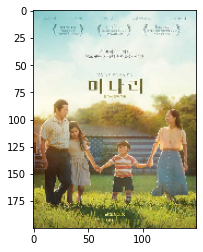

In [ ]:
find_genre("minari.jpg",'Model_6c.h5')

### 신경망 모델 2 (VGG16 pretrained model)

In [ ]:
num_classes = 28  # Types of Genres

from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(200,150, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

num_classes = 28

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='sigmoid'))

58892288/58889256 [==============================] - 37s 1us/step


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              12583936  
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 28)                28700     
Total params: 27,327,324
Trainable params: 19,692,060
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2, 
                         shear_range=0.15,horizontal_flip=True, fill_mode="nearest")

# train the network
EPOCHS=3
BS = 64

history = model.fit_generator(aug.flow(X_train, Y_train, batch_size=BS),validation_data=(X_val, Y_val), 
                    steps_per_epoch=len(X_train) // BS, epochs=EPOCHS)

model.save('Model_4d.h5')

In [ ]:
accuracy_score("Test.csv", "Model_4d.h5")